
**Using 3 models**

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd /content/gdrive/My Drive/Ensemble Learning


/content/gdrive/My Drive/Ensemble Learning


In [0]:
!ls

ANN.h5	CNN.h5	glioma.jpg  VGG16.h5  vgg16_weights.h5


In [0]:
import tensorflow as tf 

In [0]:
model_ann = tf.keras.models.load_model('ANN.h5')

In [0]:
model_cnn = tf.keras.models.load_model('CNN.h5')

In [0]:
model_cnn.summary()

In [0]:
from keras.applications import vgg16
from keras.layers.core import Dense, Flatten
from keras.models import Sequential
from keras.layers import Activation
import cv2
import numpy as np
from IPython.display import Image

import PIL

In [0]:
vgg16_model = vgg16.VGG16()

In [0]:
vgg16_model.summary()

In [0]:
model_vgg16 = Sequential()
#for layer in vgg16_model.layers:
for layer in vgg16_model.layers[:-1]: 
    model_vgg16.add(layer) 
    
model_vgg16.summary()

In [0]:
for layer in model_vgg16.layers:
    layer.trainable = False
    
model_vgg16.add(Dense(4,activation = 'softmax'))
model_vgg16.summary()

In [0]:
model_vgg16.load_weights("vgg16_weights.h5")

In [0]:
CATEGORIES = ["glioma","meningioma","no_tumor","pituitary"]

def prepare_vgg16(filepath):
    IMG_SIZE = 224 
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

def predict_vgg16(file):

    prediction = model_vgg16.predict([prepare_vgg16(file)])
    #output = CATEGORIES[int(prediction[0][0])]
    if np.argmax(prediction)==0:    
        output="glioma"
    if np.argmax(prediction)==1:
        output="meningioma"
    if np.argmax(prediction)==2:
        output="no_tumor"
    if np.argmax(prediction)==3:
        output="pituitary" 
    return output

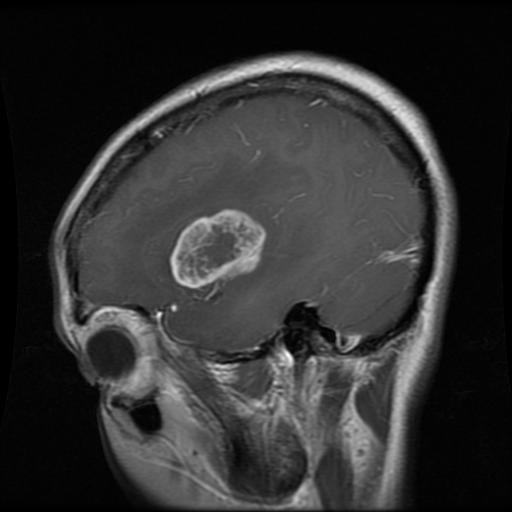

In [0]:
Image("glioma.jpg")

In [0]:
predict_vgg16("glioma.jpg")

'glioma'

In [0]:
def prepare_cnn(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

def predict_cnn(file):

    prediction = model_cnn.predict([prepare_cnn(file)])
    #output = CATEGORIES[int(prediction[0][0])]
    if np.argmax(prediction)==0:    
        output="glioma"
    if np.argmax(prediction)==1:
        output="meningioma"
    if np.argmax(prediction)==2:
        output="no_tumor"
    if np.argmax(prediction)==3:
        output="pituitary" 
    return output

def prepare_ann(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

def predict_ann(file):

    prediction = model_ann.predict([prepare_ann(file)])
    #output = CATEGORIES[int(prediction[0][0])]
    if np.argmax(prediction)==0:    
        output="glioma"
    if np.argmax(prediction)==1:
        output="meningioma"
    if np.argmax(prediction)==2:
        output="no_tumor"
    if np.argmax(prediction)==3:
        output="pituitary" 
    return output    

In [0]:
type(predict("glioma.jpg"))

str

Final

In [0]:
img = "glioma.jpg"
ann = predict_ann(img)
cnn = predict_cnn(img)
tl  = predict_vgg16(img)

if ann == cnn == tl:
  print("You have tumor :", ann)
else:
  #Augmentation and re-evaluation
  image_obj = PIL.Image.open(img).convert("RGB")
  rotated_image = image_obj.rotate(180)
  im1 = rotated_image.save("glioma.jpg")

  ann1 = predict_ann(img)
  cnn1 = predict_cnn(img)  
  tl1  = predict_vgg16(img)
  if ann1 == cnn1 == tl1:
    print("You have tumor: ", ann)

  else:
    print("Cannot accurately predict your tumor! ")

You have tumor : glioma
